In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('uber.csv')

### Preprocessing of Data 

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         200000 non-null  int64              
 1   key                200000 non-null  object             
 2   fare_amount        200000 non-null  float64            
 3   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 4   pickup_longitude   200000 non-null  float64            
 5   pickup_latitude    200000 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 13.7+ MB


In [7]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

### Outlier Detection 

{'whiskers': [<matplotlib.lines.Line2D at 0x1e083205ea0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e0832063e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e083205c00>],
 'medians': [<matplotlib.lines.Line2D at 0x1e083206920>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e083206bc0>],
 'means': []}

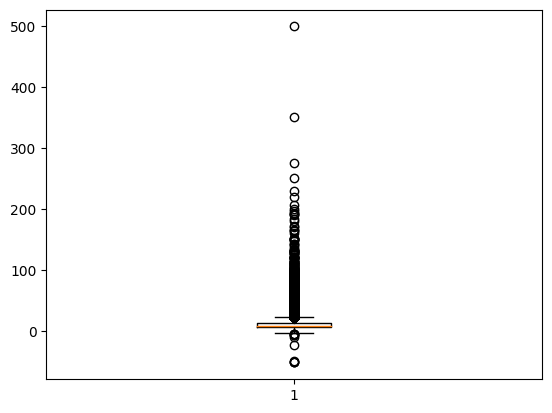

In [10]:
plt.boxplot(df['fare_amount'])

In [11]:
q_low = df["fare_amount"].quantile(0.1)
q_high = df["fare_amount"].quantile(0.99)
df = df[(df["fare_amount"] < q_high) & (df["fare_amount"] > q_low)]

In [12]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x = df.drop("fare_amount",axis=1) # predictable value
y = df["fare_amount"] #Target values

In [15]:
x['pickup_datetime'] = pd.to_numeric(pd.to_datetime(x['pickup_datetime']))
x = x.loc[:, x.columns.str.contains('^Unnamed')]

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2 , random_state = 1)

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [18]:
predict = lr.predict(x_test)

In [19]:
print(predict)

[11.66726    11.66527235 11.64752374 ... 11.6574729  11.65624866
 11.65897591]


In [20]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(predict,y_test))
print("RMSE of the model is:-",rmse)

RMSE of the model is:- 8.114520742635765


In [21]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [22]:
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)

In [24]:
rmse = np.sqrt(mean_squared_error(rf_pred,y_test))
print("RMSE of the model is:-",rmse)

RMSE of the model is:- 9.833720122727351
